# **DSC 478 - Final Project - Diabetes Prediction**

### Binita Rajbhandari, Samuel Chinta, Urvi Chawada

#### Link for the data [Kaggle](https://www.kaggle.com/thihanaung/pre-diabetes-prediction/data)
The overall idea of this project is to analyze the data and find what factors put people at risk of getting diabetes. Our goal is to help find people that are more prone to diabetes depending on different attributes.

## **Data Pre-Processing**


In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns #graph

In [ ]:
data = pd.read_csv('diabetes_dataset__2019.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
data.shape

(952, 18)

In [ ]:
data

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


###The 18 columns are:



1.   Age: The age of the subject in 4 groups
2.   Gender: Gender of the subject (M = Male, F = Female)
3.   Family_Diabetes: History of diabetes in the family(Yes/No)
4.   highBP: High Blood Pressure
5.   PhysicallyActive: Physical Active in daily life
6.   BMI: Body mass index
7.   Smoking: Smoker(Ye/No)
8.   Alcohol: Intake of Alcohol (Yes/No)
9.   Sleep: Sleep time
10.  SoundSleep: Sound Asleep time
11.  RegularMedicine: Intake of regular medicine (Yes/No)
12.  JunkFood: Intake of Junk Food
13.  Stress: Stress 
14.  BPLevel: Blodd Pressure level
15.  Pregnancies: Pregnant (Yes/No)
16.  Pdiabetes: Prediabetes (Yes/No)
17.  UriationFreq: Uriation Frequencies
18.  Diabetic: Diabetic (Yes/No)

In [ ]:
data.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


### Decscription and Frequencies

By looking at the descriptions of the data, we were able to look at the fequencies of the variables. This helps us to make dummies for the required variables.

In [ ]:
data.describe(include="all")

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
count,952,952,952,952,952,948.000000,952,952,952.000000,952.000000,952,952,952,952,910.000000,951,952,951
unique,4,2,2,2,4,NaN,2,2,NaN,NaN,3,4,4,6,NaN,3,2,3
top,less than 40,Male,no,no,less than half an hr,NaN,no,no,NaN,NaN,no,occasionally,sometimes,normal,NaN,0,not much,no
freq,488,580,498,724,336,NaN,844,760,NaN,NaN,615,672,564,707,NaN,936,664,684
mean,NaN,NaN,NaN,NaN,NaN,25.763713,NaN,NaN,6.949580,5.495798,NaN,NaN,NaN,NaN,0.386813,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5.402595,NaN,NaN,1.273189,1.865618,NaN,NaN,NaN,NaN,0.909455,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,6.000000,4.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,7.000000,6.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,8.000000,7.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


Cleaning the data.

In [ ]:
# getting the number of fields missing for each column
data.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
# checking if the null rows were dropped successfully
data.isnull().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

In [ ]:
# other modifications for cleaning the data as it didn't just have nulls
data['RegularMedicine'].replace('o', 'no', inplace =True)
data['Pdiabetes'].replace('0', 'no', inplace = True)
data['BPLevel'].replace('low', 'Low', inplace=True)
data['BPLevel'].replace('high', 'High', inplace=True)
data['Diabetic'] = data['Diabetic'].str.strip()

In [ ]:
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print(f'-'*20)

Age
less than 40    462
40-49           153
50-59           148
60 or older     142
Name: Age, dtype: int64
--------------------
Gender
Male      562
Female    343
Name: Gender, dtype: int64
--------------------
Family_Diabetes
no     472
yes    433
Name: Family_Diabetes, dtype: int64
--------------------
highBP
no     685
yes    220
Name: highBP, dtype: int64
--------------------
PhysicallyActive
less than half an hr    317
more than half an hr    251
one hr or more          208
none                    129
Name: PhysicallyActive, dtype: int64
--------------------
BMI
24.0    109
21.0     85
23.0     75
28.0     65
26.0     64
27.0     62
22.0     58
33.0     52
20.0     47
19.0     36
25.0     33
18.0     32
30.0     32
29.0     28
38.0     22
36.0     17
17.0     16
31.0     16
32.0     14
35.0     12
34.0     11
15.0      8
39.0      4
40.0      4
42.0      2
45.0      1
Name: BMI, dtype: int64
--------------------
Smoking
no     799
yes    106
Name: Smoking, dtype: int64
----------

### Getting Dummies

In [ ]:
#  this will give us dummies for all categorical variables in the dataset
# saving the data in a new dataframe data_numeric
data_numeric = pd.get_dummies(data)
data_numeric

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_High,BPLevel_Low,BPLevel_normal,BPLevel_normal,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
0,39.0,8,6,0.0,0,1,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
1,28.0,8,6,0.0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
2,24.0,6,6,0.0,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
3,23.0,8,6,0.0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
4,27.0,8,8,0.0,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,0,0,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
948,27.0,6,5,0.0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
949,23.0,6,5,0.0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
950,27.0,6,5,0.0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0


In [ ]:
data_numeric.describe()

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_High,BPLevel_Low,BPLevel_normal,BPLevel_normal,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,...,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,25.520442,6.956906,5.546961,0.386740,0.169061,0.163536,0.156906,0.510497,0.379006,0.620994,...,0.232044,0.029834,0.737017,0.001105,0.984530,0.015470,0.709392,0.290608,0.709392,0.290608
std,5.276835,1.287843,1.870904,0.910023,0.375013,0.370058,0.363913,0.500166,0.485408,0.485408,...,0.422370,0.170224,0.440497,0.033241,0.123479,0.123479,0.454294,0.454294,0.454294,0.454294
min,15.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,28.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,45.000000,11.000000,11.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 951
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BMI                                    905 non-null    float64
 1   Sleep                                  905 non-null    int64  
 2   SoundSleep                             905 non-null    int64  
 3   Pregancies                             905 non-null    float64
 4   Age_40-49                              905 non-null    uint8  
 5   Age_50-59                              905 non-null    uint8  
 6   Age_60 or older                        905 non-null    uint8  
 7   Age_less than 40                       905 non-null    uint8  
 8   Gender_Female                          905 non-null    uint8  
 9   Gender_Male                            905 non-null    uint8  
 10  Family_Diabetes_no                     905 non-null    uint8  
 11  Family

As we are predicting diabetes it makes no sense to keep people that do not have diabetes. 

In [ ]:
# dropping rows with diabetes = no 
data_numeric = data_numeric.drop(columns=['Diabetic_no'])

### Split Target Variable, Get Training and Testing Data

We divided our data in to a training and test set using an 80-20 split

In [ ]:
data_X = data_numeric.drop(columns=["Diabetic_yes"])
data_Y = data_numeric["Diabetic_yes"]

In [ ]:
# make training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(724, 40)
(181, 40)
(724,)
(181,)


# Exploratory

In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

We created a min max scaler object in order to do normalize the data. It is then used to normalize the training and testing data.

In [ ]:
# normalize data using MinMaxScalar to bring all values between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm = min_max_scaler.transform(X_train)
X_test_norm = min_max_scaler.transform(X_test)

In [ ]:
X_train_norm[5]

array([0.43, 0.29, 0.18, 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ,
       0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       1.  , 0.  , 0.  , 1.  ])

In [ ]:
X_test_norm[5]

array([0.1 , 0.29, 0.09, 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ,
       1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
       1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
       1.  , 0.  , 0.  , 1.  ])

# Correlation

We created a correlation matrix. We can see how each variable correlates to one another whether it is a positive or a negative correlation.

In [ ]:
corr_matrix = data_numeric.corr()
corr_matrix

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,Stress_very often,BPLevel_High,BPLevel_Low,BPLevel_normal,BPLevel_normal,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_yes
BMI,1.000000,-0.061319,-0.267754,-0.045647,0.131014,0.215816,0.003512,-0.260463,0.099109,-0.099109,...,0.031885,0.174560,-0.037009,-0.149021,-0.053733,-0.114958,0.114958,-0.221090,0.221090,0.152796
Sleep,-0.061319,1.000000,0.538689,0.042553,0.038006,0.028731,-0.176742,0.078842,0.073934,-0.073934,...,-0.052446,-0.109716,0.026055,0.093098,0.026954,-0.080715,0.080715,0.093906,-0.093906,-0.063654
SoundSleep,-0.267754,0.538689,1.000000,0.153701,0.066716,-0.087797,0.000539,0.014545,-0.005613,0.005613,...,-0.038014,-0.139793,0.059854,0.118356,-0.098664,-0.030370,0.030370,0.271819,-0.271819,-0.003710
Pregancies,-0.045647,0.042553,0.153701,1.000000,0.080480,0.002504,0.177311,-0.191204,0.504220,-0.504220,...,-0.105948,0.048305,-0.046002,-0.027473,-0.014142,-0.222340,0.222340,-0.048932,0.048932,0.228206
Age_40-49,0.131014,0.038006,0.066716,0.080480,1.000000,-0.199443,-0.194589,-0.460634,0.060842,-0.060842,...,-0.052123,-0.052398,-0.009784,0.055155,-0.015002,-0.062902,0.062902,0.003006,-0.003006,0.035952
Age_50-59,0.215816,0.028731,-0.087797,0.002504,-0.199443,1.000000,-0.190750,-0.451546,0.017903,-0.017903,...,0.111451,0.238204,-0.007296,-0.224473,-0.014706,-0.041408,0.041408,0.046125,-0.046125,0.184174
Age_60 or older,0.003512,-0.176742,0.000539,0.177311,-0.194589,-0.190750,1.000000,-0.440556,-0.017652,0.017652,...,0.009674,0.381789,-0.075651,-0.335761,-0.014348,0.029459,-0.029459,-0.165495,0.165495,0.459903
Age_less than 40,-0.260463,0.078842,0.014545,-0.191204,-0.460634,-0.451546,-0.440556,1.000000,-0.046021,0.046021,...,-0.050418,-0.414737,0.067777,0.369022,0.032568,0.056366,-0.056366,0.084031,-0.084031,-0.497840
Gender_Female,0.099109,0.073934,-0.005613,0.504220,0.060842,0.017903,-0.017652,-0.046021,1.000000,-1.000000,...,0.006703,-0.019376,0.010266,0.016572,-0.025983,-0.141997,0.141997,-0.177185,0.177185,0.051777
Gender_Male,-0.099109,-0.073934,0.005613,-0.504220,-0.060842,-0.017903,0.017652,0.046021,-1.000000,1.000000,...,-0.006703,0.019376,-0.010266,-0.016572,0.025983,0.141997,-0.141997,0.177185,-0.177185,-0.051777


In [ ]:
corr_matrix["Diabetic_yes"].sort_values(ascending=False)

Diabetic_yes                             1.000000
RegularMedicine_yes                      0.605167
Age_60 or older                          0.459903
BPLevel_High                             0.432218
highBP_yes                               0.374823
Family_Diabetes_yes                      0.263889
Stress_always                            0.257325
Pregancies                               0.228206
Age_50-59                                0.184174
Pdiabetes_yes                            0.156407
BMI                                      0.152796
UriationFreq_quite often                 0.115614
PhysicallyActive_none                    0.114939
JunkFood_occasionally                    0.074550
Alcohol_yes                              0.064051
Stress_very often                        0.058236
Gender_Female                            0.051777
Age_40-49                                0.035952
PhysicallyActive_one hr or more          0.020555
Smoking_no                               0.013656


Let's analyze the correlation matrix here -

1. Regular Medicine_yes has the highest correlation to diabetes_yes which tells us that people with diabetes are on regular medication
2. We also see that higher age (>60) has a higher correlation to having diabetes than people with lower ages.
3. We can see that being physically active, drinking alcohol, gender do not have a huge impact on diabetes=yes, since the correlation is very low
4. Genetics can also play a role in having diabetes, we see a 0.26 correlation of family_diabetes=yes and is positively correlated to having diabetes

# Visualization

We are visualizing each variables with the target variable through a histogram. 

In [ ]:
data.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

In [ ]:
feature = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic']

In [ ]:
list(enumerate(feature))

[(0, 'Age'),
 (1, 'Gender'),
 (2, 'Family_Diabetes'),
 (3, 'highBP'),
 (4, 'PhysicallyActive'),
 (5, 'BMI'),
 (6, 'Smoking'),
 (7, 'Alcohol'),
 (8, 'Sleep'),
 (9, 'SoundSleep'),
 (10, 'RegularMedicine'),
 (11, 'JunkFood'),
 (12, 'Stress'),
 (13, 'BPLevel'),
 (14, 'Pregancies'),
 (15, 'Pdiabetes'),
 (16, 'UriationFreq'),
 (17, 'Diabetic')]

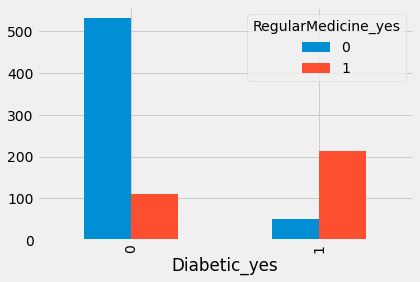

In [ ]:
# let's perform cross tabulation on highlt correlated variables
# checking the crosstabulation of Diabetic_yes and regular medicine=yes
pd.crosstab(data_numeric["Diabetic_yes"], data_numeric["RegularMedicine_yes"]).plot(kind="bar")

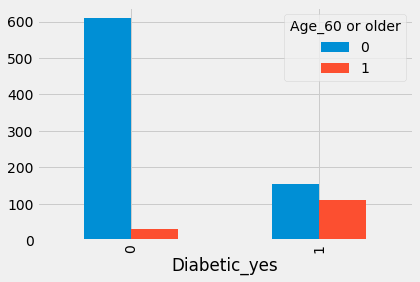

In [ ]:
# checking the crosstabulation of Diabetic_yes and age 60 or older
pd.crosstab(data_numeric["Diabetic_yes"], data_numeric["Age_60 or older"]).plot(kind="bar")

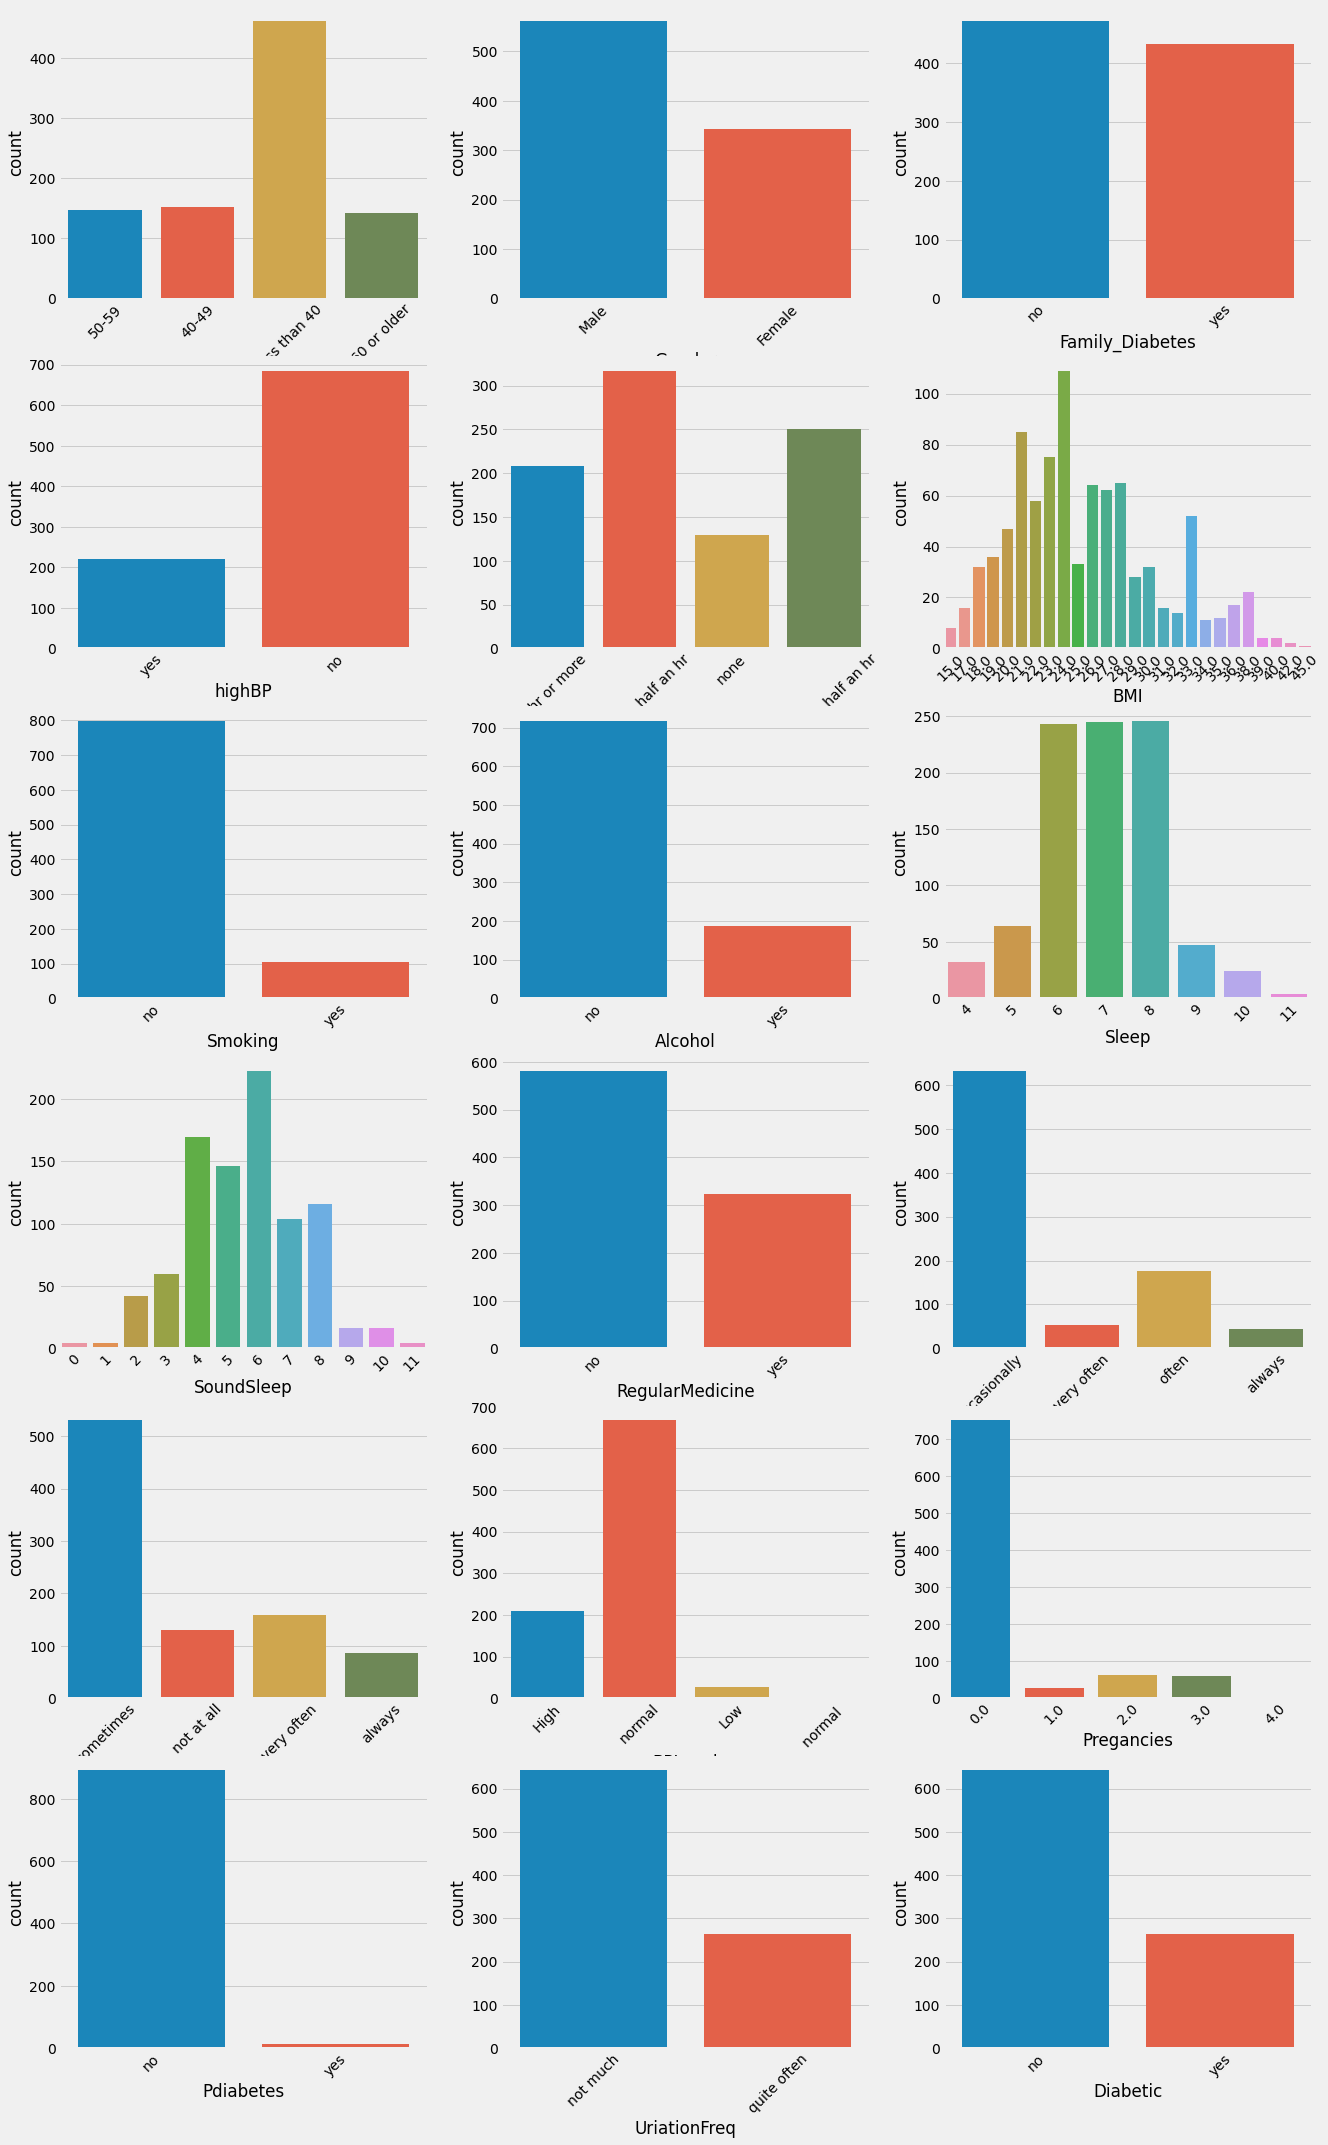

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,35))
for i in enumerate(feature):
  plt. subplot(6,3, i[0]+1)
  sns.countplot(i[1], data= data)
  plt.xticks(rotation = 45)

# **Feature Selection**

### Feature selection helps determine what the more important features are. So we will be using a reduced dataset with only the selected features for our analysis. We can compare the accuracy of the classifications feature selected dataset.

In [ ]:
from sklearn import feature_selection

In [ ]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=30)
X_train_fs = fs.fit_transform(X_train_norm, Y_train)

In [ ]:
np.set_printoptions(suppress=True, precision=2, linewidth=80)
print(fs.get_support())
print (fs.scores_)

[False False False  True False False  True  True False False  True  True  True
  True False False False False False False False False  True  True False False
 False False  True False False False  True False  True False False False False
 False]
[  1.91   0.17   0.    22.4    0.03  22.11 130.03  88.02   2.42   1.51  25.36
  28.33  25.82  74.14   1.83   0.23   6.61   0.04   0.     0.03   1.14   4.62
  98.94 174.47   1.31   0.88   1.02   0.18  53.09   0.    13.32   1.45 111.25
   7.97  29.06   0.42   0.35  18.93   3.95   9.34]


In [ ]:
print (data_X.columns[fs.get_support()].values)

['Pregancies' 'Age_60 or older' 'Age_less than 40' 'Family_Diabetes_no'
 'Family_Diabetes_yes' 'highBP_no' 'highBP_yes' 'RegularMedicine_no'
 'RegularMedicine_yes' 'Stress_always' 'BPLevel_High' 'BPLevel_normal']


In [ ]:
for i in range(len(data_X.columns.values)):
    if fs.get_support()[i]:
        print (data_X.columns.values[i],'\t', fs.scores_[i])

Pregancies 	 22.398002325968566
Age_60 or older 	 130.02541613849525
Age_less than 40 	 88.0202187474318
Family_Diabetes_no 	 25.35986383788727
Family_Diabetes_yes 	 28.325929783838983
highBP_no 	 25.816437295954252
highBP_yes 	 74.13597234185792
RegularMedicine_no 	 98.94117932644598
RegularMedicine_yes 	 174.46879713289323
Stress_always 	 53.08590904046229
BPLevel_High 	 111.24764867574295
BPLevel_normal 	 29.057395682554585


# **Reduced Data**

The reduced data includes: Age_50-59, Age_60 or older, Age_less than 40, Family_Diabetes_no, Family_Diabetes_yes, highBP_no, highBP_yes, RegularMedicine_no, RegularMedicine_yes, Stress_always, BPLevel_High, BPLevel_normal. 

In [ ]:
X_train_fs = X_train[['Age_50-59','Age_60 or older','Age_less than 40','Family_Diabetes_no','Family_Diabetes_yes','highBP_no','highBP_yes','RegularMedicine_no','RegularMedicine_yes','Stress_always','BPLevel_High','BPLevel_normal']]
X_test_fs = X_test[['Age_50-59','Age_60 or older','Age_less than 40','Family_Diabetes_no','Family_Diabetes_yes','highBP_no','highBP_yes','RegularMedicine_no','RegularMedicine_yes','Stress_always','BPLevel_High','BPLevel_normal']]
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train_fs)
X_train_norm_fs = min_max_scaler.transform(X_train_fs)
X_test_norm_fs = min_max_scaler.transform(X_test_fs)

# **Decision Tree**

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
import sklearn.metrics as metrics
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score,plot_confusion_matrix

A decision tree is being created here.

In [ ]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [ ]:
treeclf = treeclf.fit(X_train_norm, Y_train)

In [ ]:
treepreds_test = treeclf.predict(X_test_norm)
print (treepreds_test)

[1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0]


In [ ]:
print (treeclf.score(X_test_norm, Y_test))

0.9668508287292817


The average accuracy using the training data shows that it is nearly perfect because the model was trained using this data.

In [ ]:
print (treeclf.score(X_train_norm, Y_train))

0.9765193370165746


In [ ]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=X_train.columns)

Visulization of the decision tree

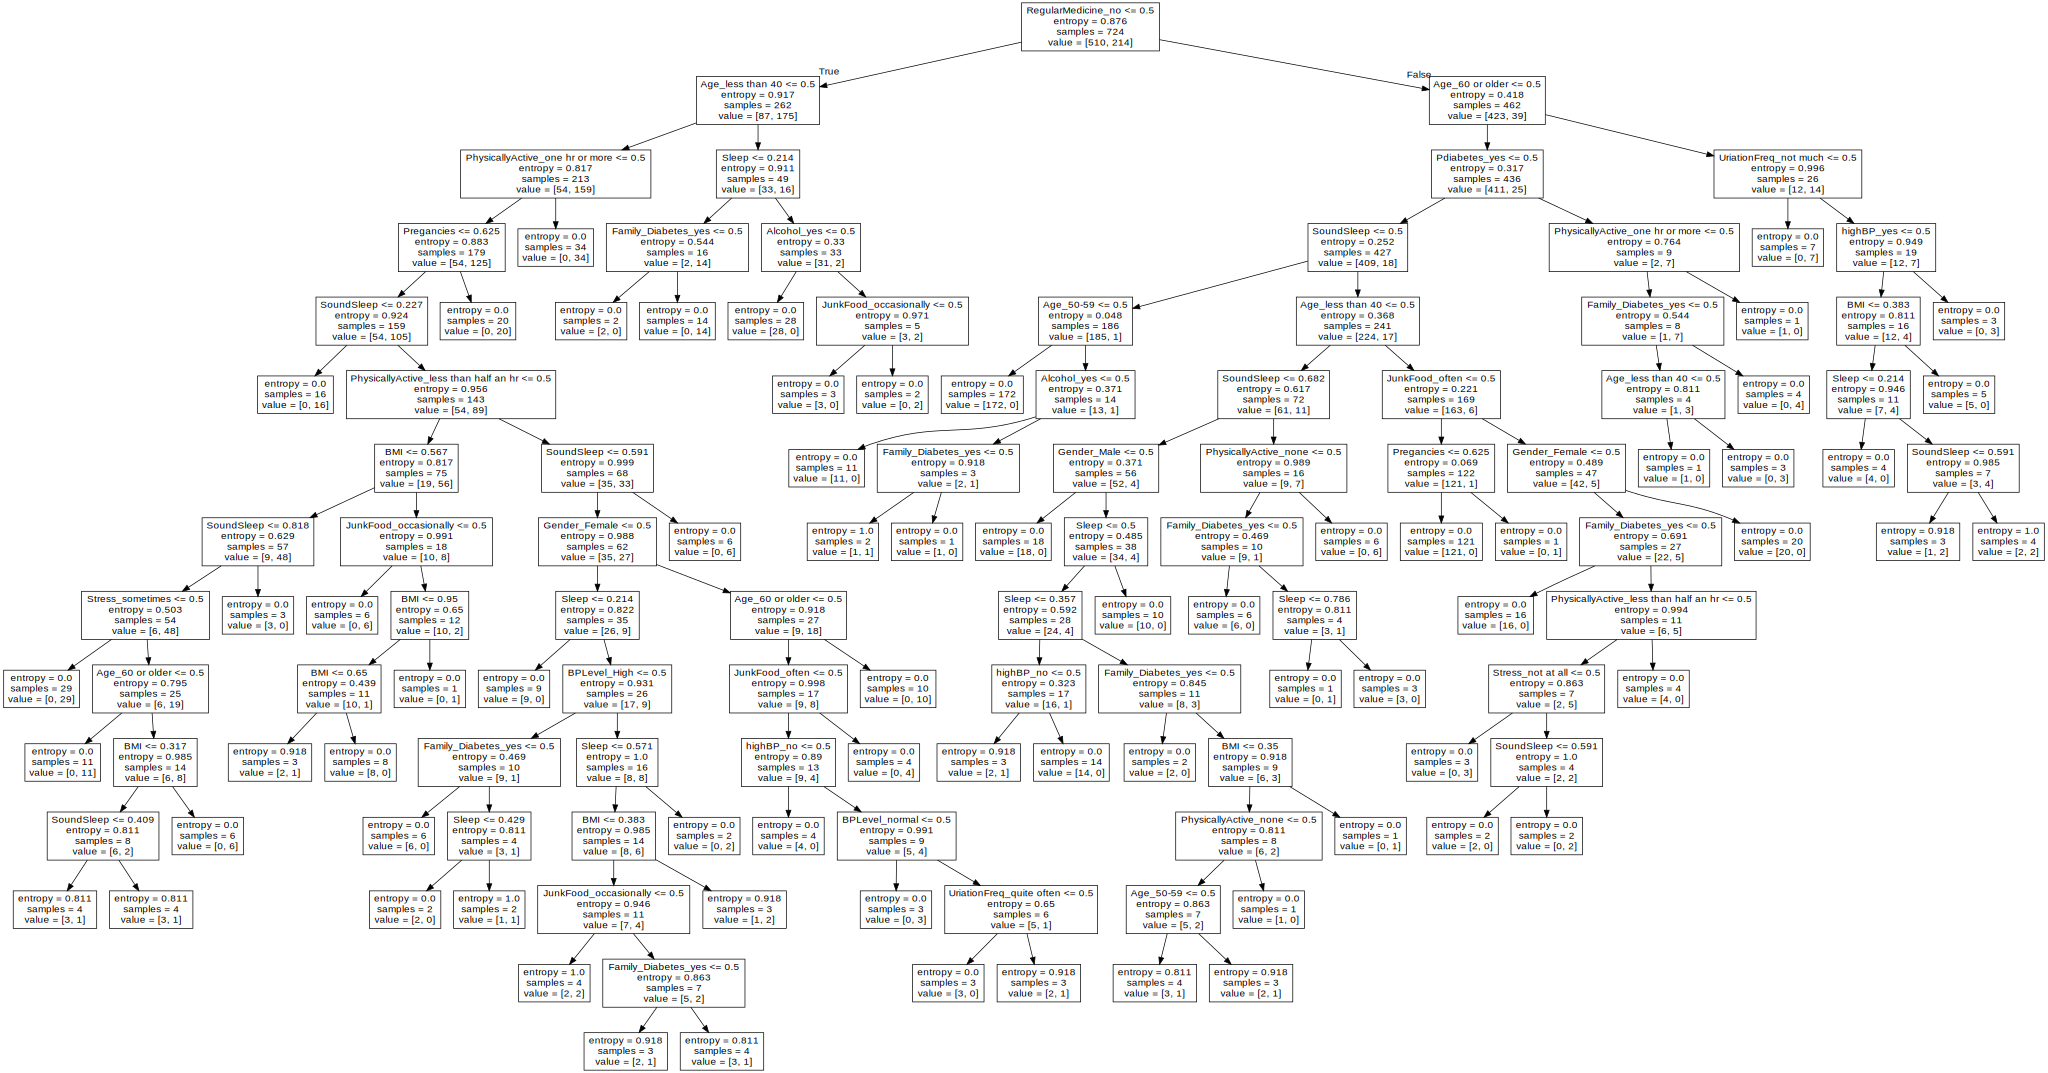

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
pr = treeclf.predict_proba(X_test_norm)

In [ ]:
prd = pr[:,1]
FalsePR, TruePR, threshold = metrics.roc_curve(Y_test, prd)
auc = metrics.auc(FalsePR, TruePR)

The ROC curve is visualized here and the area under the curve comes out to 0.96.

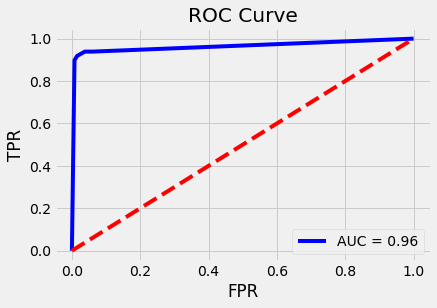

In [ ]:
plt.title('ROC Curve')
plt.plot(FalsePR, TruePR, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

# **Decision Tree Reduced Data**

### We try it with the feature selection, the reduced data and see what impact it has on the model and if it improves. 

In [ ]:
treeclfFS = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [ ]:
treeclfFS = treeclf.fit(X_train_norm_fs, Y_train)

In [ ]:
treepreds_testFS = treeclf.predict(X_test_norm_fs)
print (treepreds_testFS)

[1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]


Both the training and test data seems to decrease instead of improving.

In [ ]:
print (treeclfFS.score(X_test_norm_fs, Y_test))

0.8784530386740331


In [ ]:
print (treeclfFS.score(X_train_norm_fs, Y_train))

0.9005524861878453


Visulization of the decision tree with feature selection

In [ ]:
export_graphviz(treeclfFS,out_file='tree.dot', feature_names=X_train_fs.columns)

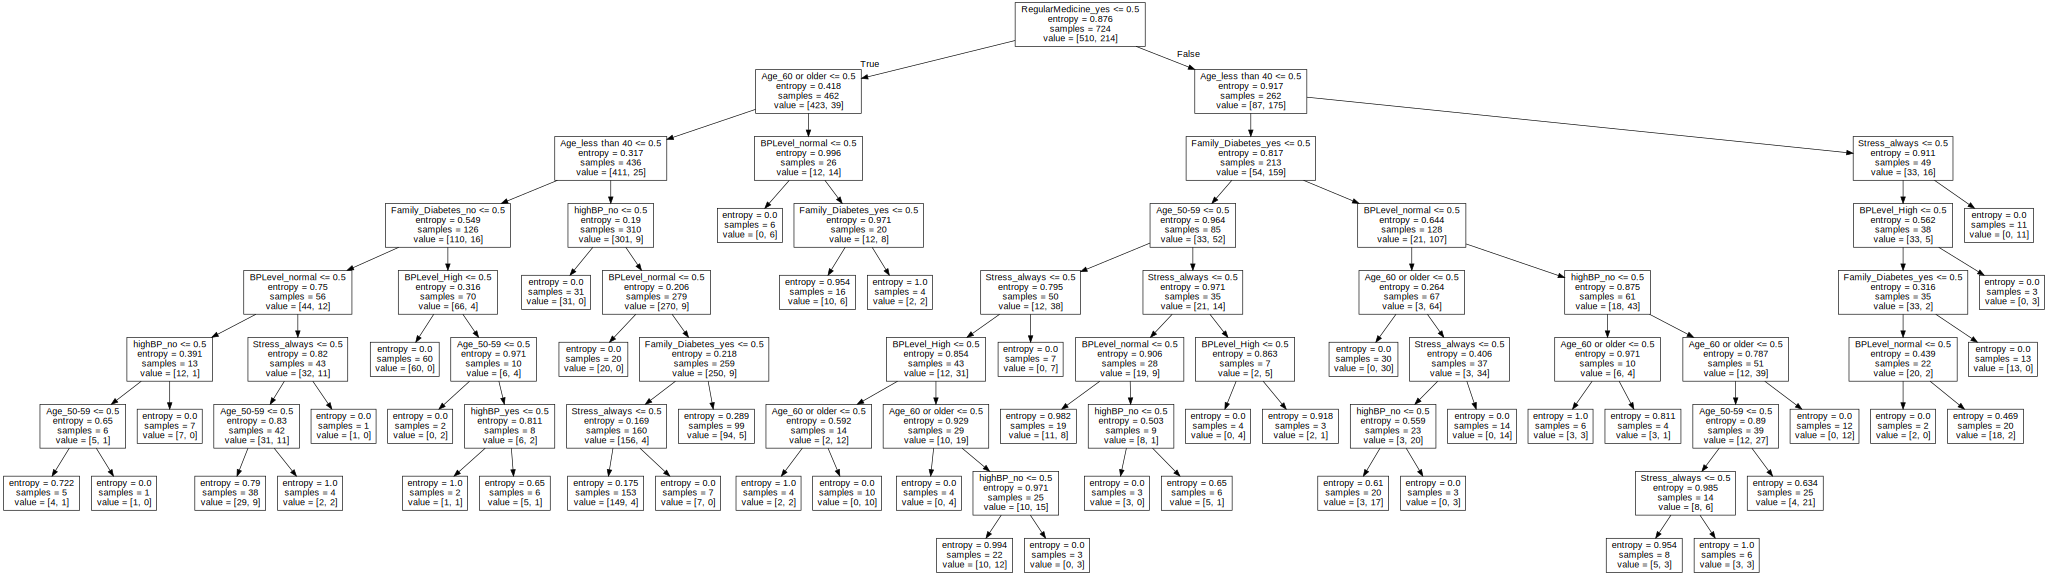

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
prFS = treeclfFS.predict_proba(X_test_norm_fs)
prdFS = prFS[:,1]
FalsePRFS, TruePRFS, thresholdFS = metrics.roc_curve(Y_test, prdFS)
aucFS = metrics.auc(FalsePRFS, TruePRFS)

ROC Curve with feature selcetion is created and the area under the curve has decrease to 0.92.

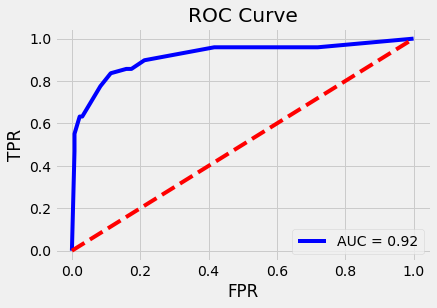

In [ ]:
plt.title('ROC Curve')
plt.plot(FalsePRFS, TruePRFS, 'b', label = 'AUC = %0.2f' % aucFS)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

# **Decision Tree Evaluation**

In [ ]:
from sklearn.metrics import classification_report

This is a classification report for the decision tree. We can see the precision, recall scores and the model accuracy. The accuracy is 0.97 and that matches up with the value from the ROC curve as well as the earlier printed average accuracy scores mentioned above

In [ ]:
print(classification_report(Y_test, treepreds_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       132
           1       0.96      0.92      0.94        49

    accuracy                           0.97       181
   macro avg       0.96      0.95      0.96       181
weighted avg       0.97      0.97      0.97       181



This is  classification report for the decision tree after feature selection. The accuracy score has decrease from 0.97 to 0.88 so the original data is better. The ROC curve also decreased from 0.96 to 0.92. 



In [ ]:
print(classification_report(Y_test, treepreds_testFS))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       132
           1       0.89      0.63      0.74        49

    accuracy                           0.88       181
   macro avg       0.88      0.80      0.83       181
weighted avg       0.88      0.88      0.87       181



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score,plot_confusion_matrix
import imblearn
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

A Random Forest is being generate here.

In [ ]:
def grid_search(X_tr, X_te, y_tr, y_te, model, params, scoring='recall'):
    gs = GridSearchCV(estimator = model, param_grid = params, scoring = scoring, n_jobs=-1, cv=3)
    gs.fit(X_tr, y_tr)
    y_pred = gs.predict(X_te)
    print(f"{model}")
    print(f"Best parameter      : {gs.best_params_}")
    print(f"Test Accuracy Score : {accuracy_score(y_te, y_pred)}")
    print(f"Train Accuracy Score: {accuracy_score(y_tr, gs.predict(X_tr))}")
    print(f"Recall score        : {recall_score(y_te, y_pred)}")
    print(f"Classification Report \n{'-'*30}\n {classification_report(y_te, y_pred)}")
    return gs.best_params_

This is a classification report for the random forest. We can see the precision, recall scores and the model accuracy. The accuracy is 0.96 and that is almost the same with the decision tree with the orginal data. 

In [ ]:
params = {
    'n_estimators':[100, 200, 300, 400, 500, 600],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 10, 15, 20],
}
model = RandomForestClassifier(random_state=123)
rf_best = grid_search(X_train, X_test, Y_train, Y_test, model, params, scoring='accuracy')

RandomForestClassifier(random_state=123)
Best parameter      : {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
Test Accuracy Score : 0.9558011049723757
Train Accuracy Score: 0.9737569060773481
Recall score        : 0.8979591836734694
Classification Report 
------------------------------
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.94      0.90      0.92        49

    accuracy                           0.96       181
   macro avg       0.95      0.94      0.94       181
weighted avg       0.96      0.96      0.96       181



In [ ]:
rf = RandomForestClassifier(n_estimators=rf_best['n_estimators'], criterion=rf_best['criterion'], max_depth=rf_best['max_depth'], 
                                  random_state=123)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, random_state=123)

A Confusion matrix was plotted.

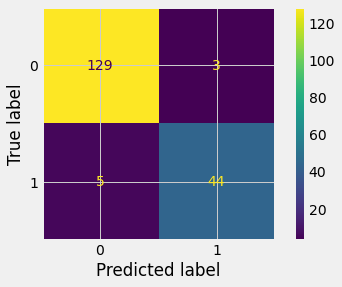

In [ ]:
plot_confusion_matrix(rf, X_test, Y_test)
plt.show()

We can see that Regular medicine, Age and BMI are important feture to predict diabetes. 

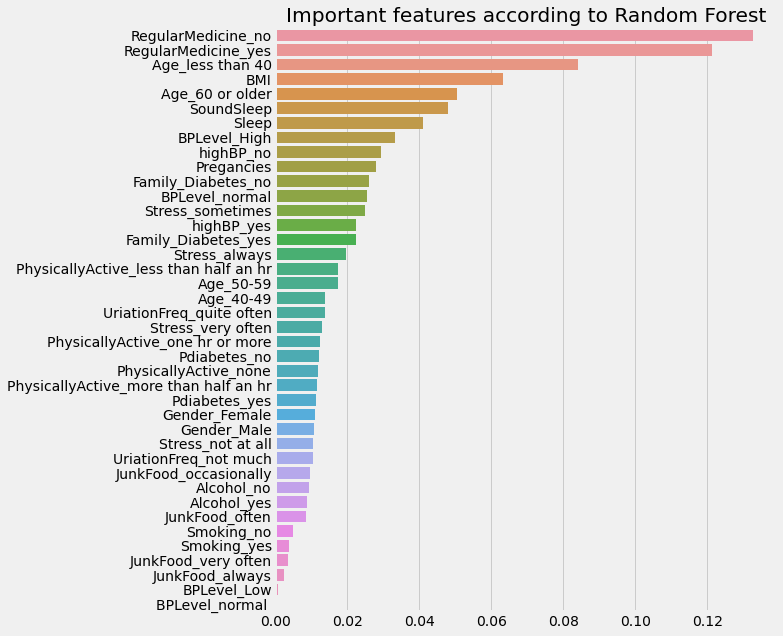

In [ ]:
features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,10))
g = sns.barplot(features, features.index)
plt.title("Important features according to Random Forest");

# **KNN implementation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #main machine learning model for KNN classifer
from sklearn.metrics import confusion_matrix, classification_report #for testing
from sklearn.metrics import f1_score #for testing
from sklearn.metrics import accuracy_score #for testing

In [ ]:
classifer = KNeighborsClassifier (n_neighbors = 1 , p = 2, metric = 'euclidean')
classifer.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [ ]:
Y_pred = classifer.predict(X_test) # predict the data

In [ ]:
Y_pred #all the predictions

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
Y_test #all the labels

70     1
504    0
265    1
297    1
39     1
      ..
912    0
489    0
831    0
25     0
84     0
Name: Diabetic_yes, Length: 181, dtype: uint8

In [ ]:
cm = confusion_matrix (Y_test, Y_pred)
print(cm)
print(f1_score(Y_test,Y_pred)) # obejective view of the model
print(accuracy_score(Y_test,Y_pred))
cr = classification_report(Y_test, Y_pred)
print(cr)

[[128   4]
 [  6  43]]
0.8958333333333333
0.9447513812154696
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       132
           1       0.91      0.88      0.90        49

    accuracy                           0.94       181
   macro avg       0.94      0.92      0.93       181
weighted avg       0.94      0.94      0.94       181



In [ ]:
import math
math.sqrt(len(Y_test))

13.45362404707371

In [ ]:
#predicting the best k value
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != Y_test))


In [ ]:
min = 0
min_num = []
for i in range(len(error_rate)):
  if error_rate[i] < min:
    min = error_rate[i]
    min_num = [min, i+1]
    
  error_rate[0: 5]

Text(0, 0.5, 'Error rate')

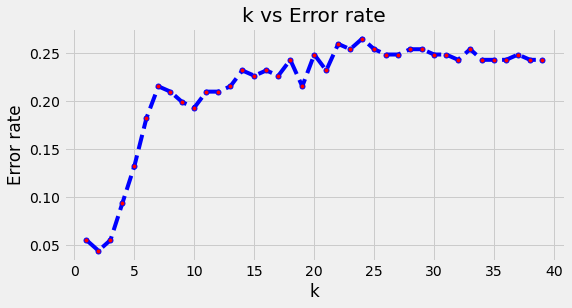

In [ ]:
plt.figure (figsize = (8,4))

plt.plot (range(1,40), error_rate, color = 'blue', linestyle = '--', markersize = 5, markerfacecolor = 'red', marker = 'o')
plt.title ('k vs Error rate')
plt.xlabel ('k')
plt.ylabel ('Error rate')

As k increases the error rate also increases and accuracy decreases.

In [ ]:
knn = KNeighborsClassifier (n_neighbors = 2 , p = 2, metric = 'euclidean')
knn.fit(X_train,Y_train)
predictions = knn.predict(X_test)

print(confusion_matrix(Y_test,predictions))
print(f1_score(Y_test,predictions)) # objective view of the model
print(accuracy_score(Y_test,predictions))
print(classification_report(Y_test,predictions))

[[130   2]
 [  6  43]]
0.9148936170212767
0.9558011049723757
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.96      0.88      0.91        49

    accuracy                           0.96       181
   macro avg       0.96      0.93      0.94       181
weighted avg       0.96      0.96      0.96       181



# *Naive Bayes*

In [ ]:
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [ ]:
# trying the Gaussian Naive Bayes classifier
nbclf = naive_bayes.GaussianNB()

##### trying the Gaussian Naive Bayes classifier

In [ ]:
# fitting the model on training data set 
nbclf = nbclf.fit(X_train_norm, Y_train)
nbclf.score(X_train_norm, Y_train)

0.5331491712707183

In [ ]:
# Predicting the results

In [ ]:
# running the model for testing data set
nbpreds_test = nbclf.predict(X_test_norm)
print (nbpreds_test)

[1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0
 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0]


In [ ]:
# checking the accuracy score
print (nbclf.score(X_test_norm, Y_test))
print ("Model accuracy score on testing data= {}%".format(accuracy_score(Y_test, nbpreds_test)*100))

0.5966850828729282
Model accuracy score on testing data= 59.66850828729282%


In [ ]:
# let's look at the train-test accuracy 
nbpreds_train = nbclf.predict(X_train_norm)
print (nbpreds_train)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
# checking the accuracy score on training data
print (nbclf.score(X_train_norm, Y_train))
print ("Model accuracy score on training data= {}%".format(accuracy_score(Y_train, nbpreds_train)*100))

0.5331491712707183
Model accuracy score on training data= 53.31491712707182%


In [ ]:
# Checking for overfitting and underfitting 
print('Training set score: {:.2f}'.format(accuracy_score(Y_train, nbpreds_train)*100))

print('Test set score: {:.2f}'.format(accuracy_score(Y_test, nbpreds_test)*100))


Training set score: 53.31
Test set score: 59.67


Looking at the above scores, we see that enough similiarity between them, but we only see a small sign of underfitting

In [ ]:
Y_test.shape

(181,)

### Confusion Matrix

In [ ]:
# gettigng the confusion matrix
nbcm = confusion_matrix(Y_test, nbpreds_test)
print (nbcm)

[[60 72]
 [ 1 48]]


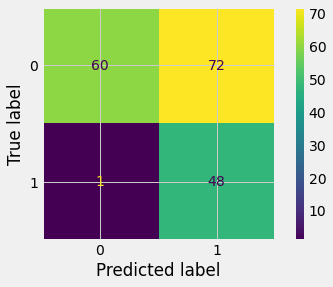

In [ ]:
# plotting a confusion matrix
nbcm = confusion_matrix(Y_test, nbpreds_test)
disp = ConfusionMatrixDisplay(confusion_matrix=nbcm, display_labels=nbclf.classes_)
disp.plot()
plt.show()

In [ ]:
print('Confusion matrix\n\n', nbcm)

TP = nbcm[0,0]
TN = nbcm[1,1]
FP = nbcm[0,1]
FN = nbcm[1,0]
print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)


Confusion matrix

 [[60 72]
 [ 1 48]]

True Positives(TP) =  60

True Negatives(TN) =  48

False Positives(FP) =  72

False Negatives(FN) =  1


According to the confusion matrix above, we see that the classifier has correctly classified 60 rows where a person had diabetes and correctly classified 48 rows where a person did not have diabetes. But the classifier had 72 false positives which is higher than the true positives.

### Classification Report

In [ ]:
# printing the classification report
print(classification_report(Y_test, nbpreds_test))

              precision    recall  f1-score   support

           0       0.98      0.45      0.62       132
           1       0.40      0.98      0.57        49

    accuracy                           0.60       181
   macro avg       0.69      0.72      0.59       181
weighted avg       0.83      0.60      0.61       181



In [ ]:
# lets look at the classification accuracy and classification error using the confusion matrix
classification_accuracy = (TP + TN)/ (TP+TN+FP+FN)

classification_error = (FP + FN)/ (TP+TN+FP+FN)

print (classification_accuracy, classification_error)


0.5966850828729282 0.40331491712707185


### ROC-AUC curve

In [ ]:
# ROC -AUC curve
from sklearn.metrics import roc_curve, auc

In [ ]:
nbpreds_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=uint8)

In [ ]:
fpr, tpr, threshold = roc_curve(Y_test, nbpreds_test)
auc_score = auc(fpr, tpr)

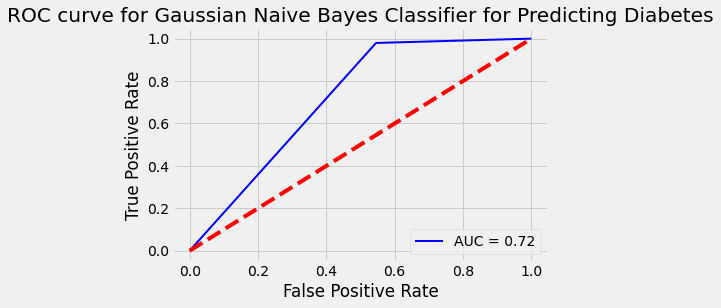

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, 'b', linewidth=2, label = 'AUC = %0.2f' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Diabetes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC AUC is the percentage of the ROC plot that is underneath the curve. the higher the score, the better the score. our close is 0.72 which says our classifier is okay.

### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
k = 10

In [ ]:
scores = cross_val_score(nbclf, X_train_norm, Y_train, cv=k, scoring='accuracy')
scores

array([0.47, 0.53, 0.82, 0.52, 0.51, 0.53, 0.44, 0.5 , 0.57, 0.81])

In [ ]:
cvs = []
for i in range(1, k+1):
  cvs.append(i)

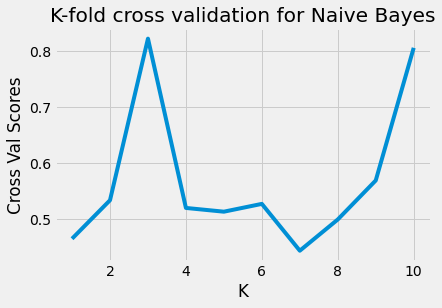

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cvs, scores)
plt.title('K-fold cross validation for Naive Bayes')
plt.xlabel('K')
plt.ylabel('Cross Val Scores')
plt.show()

Looking at the above k-fold cross validation scores, we see a very high variance between different values of k. For example, we see a high accuracy score for k values 3 and 10 which is around 80%, but a very low score of less than 50% for k=7 

In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.5704


If we are to look at the average cross-val-score, we can conclude that we expect the model to be around 57.04% accurate.

### Naive Bayes (Gaussian) on Reduced Feature Data

```
# This is formatted as code
```



In [ ]:
# trying the Gaussian Naive Bayes classifier
nbclf_fs = naive_bayes.GaussianNB()

In [ ]:
# fitting the model on training data set 
nbclf_fs = nbclf_fs.fit(X_train_norm_fs, Y_train)
nbclf_fs.score(X_train_norm_fs, Y_train)

0.8522099447513812

In [ ]:
# Predicting the results...

In [ ]:
# running the model for testing data set
nbpreds_test_fs = nbclf_fs.predict(X_test_norm_fs)
print (nbpreds_test_fs)

[1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]


In [ ]:
# checking the accuracy score
print (nbclf_fs.score(X_test_norm_fs, Y_test))
print ("Model accuracy score on testing data= {}%".format(accuracy_score(Y_test, nbpreds_test_fs)*100))

0.8232044198895028
Model accuracy score on testing data= 82.32044198895028%


In [ ]:
# let's look at the train-test accuracy 
nbpreds_train_fs = nbclf_fs.predict(X_train_norm_fs)
print (nbpreds_train_fs)

[0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0

In [ ]:
# checking the accuracy score on training data
print (nbclf_fs.score(X_train_norm_fs, Y_train))
print ("Model accuracy score on training data= {}%".format(accuracy_score(Y_train, nbpreds_train_fs)*100))

0.8522099447513812
Model accuracy score on training data= 85.22099447513813%


In [ ]:
# Checking for overfitting and underfitting 
print('Training set score: {:.2f}'.format(accuracy_score(Y_train, nbpreds_train_fs)*100))

print('Test set score: {:.2f}'.format(accuracy_score(Y_test, nbpreds_test_fs)*100))

Training set score: 85.22
Test set score: 82.32


Looking at the above scores, we see enough similiarity between them, we don't see any big signs of overfitting and underfitting

### Confusion Matrix

In [ ]:
# gettigng the confusion matrix
nbcm_fs = confusion_matrix(Y_test, nbpreds_test_fs)
print (nbcm_fs)

[[112  20]
 [ 12  37]]


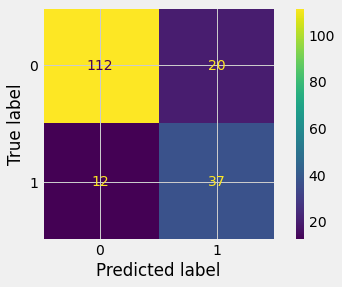

In [ ]:
# plotting a confusion matrix
nbcm_fs = confusion_matrix(Y_test, nbpreds_test_fs)
disp = ConfusionMatrixDisplay(confusion_matrix=nbcm_fs, display_labels=nbclf_fs.classes_)
disp.plot()
plt.show()

In [ ]:
print('Confusion matrix\n\n', nbcm_fs)

TP = nbcm_fs[0,0]
TN = nbcm_fs[1,1]
FP = nbcm_fs[0,1]
FN = nbcm_fs[1,0]
print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)


Confusion matrix

 [[112  20]
 [ 12  37]]

True Positives(TP) =  112

True Negatives(TN) =  37

False Positives(FP) =  20

False Negatives(FN) =  12


According to the confusion matrix above, we see that the classifier has correctly classified 112 rows where a person had diabetes and correctly classified 37 rows where a person did not have diabetes. 
Model fit on reduced feature data has a higher accuracy score than the model fit on normal data. Surprisingly, the model fits well on the reduced data, and it may be because of some noisy features which were removed in the feature reduction process.

In [ ]:
# printing the classification report
print(classification_report(Y_test, nbpreds_test_fs))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       132
           1       0.65      0.76      0.70        49

    accuracy                           0.82       181
   macro avg       0.78      0.80      0.79       181
weighted avg       0.83      0.82      0.83       181



In [ ]:
# lets look at the classification accuracy and classification error using the confusion matrix
classification_accuracy = (TP + TN)/ (TP+TN+FP+FN)

classification_error = (FP + FN)/ (TP+TN+FP+FN)

print (classification_accuracy, classification_error)


0.8232044198895028 0.17679558011049723


The classification matrix gives a lower classification error than the model fit on normal data. 

### ROC AUC Curve

In [ ]:
fpr, tpr, threshold = roc_curve(Y_test, nbpreds_test_fs)
auc_score = auc(fpr, tpr)

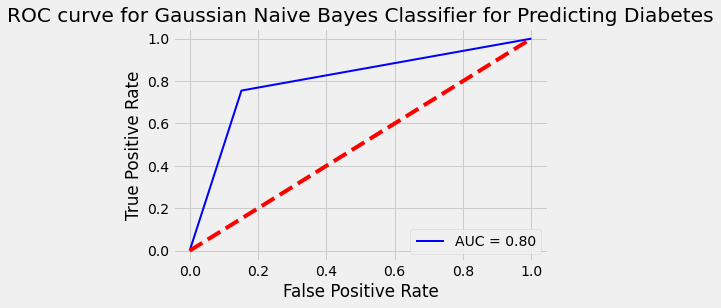

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, 'b', linewidth=2, label = 'AUC = %0.2f' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Diabetes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC AUC is the percentage of the ROC plot that is underneath the curve. the higher the score, the better the score. our close is 0.80 which says our classifier is good!

### K-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
k = 10

In [ ]:
scores_fs = cross_val_score(nbclf_fs, X_train_norm_fs, Y_train, cv=k, scoring='accuracy')
scores_fs

array([0.88, 0.81, 0.84, 0.82, 0.83, 0.89, 0.85, 0.89, 0.83, 0.85])

In [ ]:
cvs_fs = []
for i in range(1, k+1):
  cvs_fs.append(i)

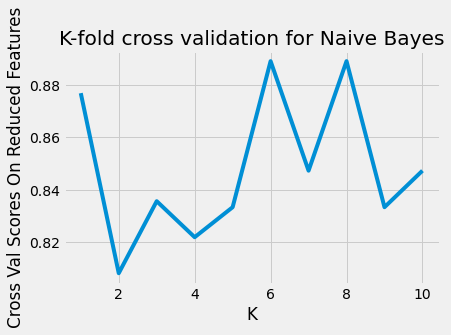

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cvs_fs, scores_fs)
plt.title('K-fold cross validation for Naive Bayes')
plt.xlabel('K')
plt.ylabel('Cross Val Scores On Reduced Features')
plt.show()

Looking at the above k-fold cross validation scores, we see a very high variance in the lower k values, but as we increase the k, the variance decreases and we see a higher accuracy score. K=6 and K=8 has the highest scores of 89% 

In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores_fs.mean()))

Average cross-validation score: 0.8481


If we are to look at the average cross-val-score, we can conclude that we expect the model to be around 84.81% accurate.

##### Let's compare the Naive Bayes Gaussian Classifier on Normal Data and Reduced Feature Data
Overall, data with reduced features has a better accuracy score on both training and testing data. Data with reduced features also does not have much underfitting on the model. We also see a better accuracy score and a lesser error on the model, and we also have better average cross validation score. 
Reducing the features with low impact took out some of the noise in the data which helped the Gaussian classifier better fit the model.

### Bernoulli Naive Bayes classifier


##### Let's try fitting the model with the Bernoulli  Naive Bayes Classifier as our predictive variable is a binary variable

In [ ]:
# trying the Bernoulli Naive Bayes classifier since some of the data we have has different classes
mnbclf = naive_bayes.BernoulliNB()

In [ ]:
# fitting the model on training data set 
mnbclf = mnbclf.fit(X_train_norm, Y_train)
mnbclf.score(X_train_norm, Y_train)

0.8715469613259669

In [ ]:
# running the model for testing data set
mnbpreds_test = mnbclf.predict(X_test_norm)
print (mnbpreds_test)

[1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]


In [ ]:
print (mnbclf.score(X_test_norm, Y_test))

0.8729281767955801


In [ ]:
print ("Accuracy = {}%".format(accuracy_score(Y_test, mnbpreds_test)*100))

Accuracy = 87.29281767955801%


In [ ]:
# let's look at the train-test accuracy 
mnbpreds_train = mnbclf.predict(X_train_norm)
print (mnbpreds_train)

[0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0

In [ ]:
# Checking for overfitting and underfitting 
print('Training set score: {:.2f}'.format(accuracy_score(Y_train, mnbpreds_train)*100))

print('Test set score: {:.2f}'.format(accuracy_score(Y_test, mnbpreds_test)*100))

Training set score: 87.15
Test set score: 87.29


In [ ]:
print(classification_report(Y_test, mnbpreds_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       132
           1       0.77      0.76      0.76        49

    accuracy                           0.87       181
   macro avg       0.84      0.84      0.84       181
weighted avg       0.87      0.87      0.87       181



Analyzing the classification report, we see that the Bernoulli NB classifier correctly classifies approximately 87.3% of rows, which is better than the Gaussian Naive Bayes as it only classifies 59.7% of rows correctly.

In [ ]:
# getting the confusion matrix
mnbcm = confusion_matrix(Y_test, mnbpreds_test)
print (mnbcm)

[[121  11]
 [ 12  37]]


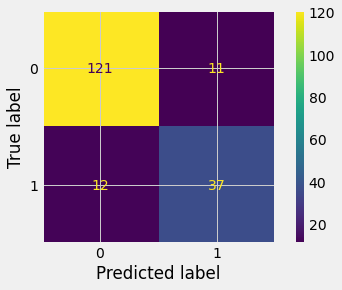

In [ ]:
# plotting a confusion matrix
mnbcm = confusion_matrix(Y_test, mnbpreds_test)
disp = ConfusionMatrixDisplay(confusion_matrix=mnbcm, display_labels=mnbclf.classes_)
disp.plot()
plt.show()

In [ ]:
print('Confusion matrix\n\n', mnbcm)

TP = mnbcm[0,0]
TN = mnbcm[1,1]
FP = mnbcm[0,1]
FN = mnbcm[1,0]
print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)


Confusion matrix

 [[121  11]
 [ 12  37]]

True Positives(TP) =  121

True Negatives(TN) =  37

False Positives(FP) =  11

False Negatives(FN) =  12


According to the confusion matrix above, we see that the classifier has correctly classified 121 rows where a person did not have diabetes and correctly classified 37 rows where a person had diabetes. The model only has 11 false positives which is comparatively very less than the Gaussian model which had more false positives than true positives.

In [ ]:
# trying the classifier on reduced features
# fitting the model on training data set 
mnbclf_fs = mnbclf.fit(X_train_norm_fs, Y_train)
mnbclf_fs.score(X_train_norm_fs, Y_train)

0.8660220994475138

In [ ]:
# running the model for testing data set
mnbpreds_test_fs = mnbclf.predict(X_test_norm_fs)
print (mnbpreds_test)

[1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]


In [ ]:
print ("Accuracy = {} %".format(accuracy_score(Y_test, mnbpreds_test_fs)*100))

Accuracy = 85.6353591160221 %


In [ ]:
# let's look at the train-test accuracy 
mnbpreds_train_fs = mnbclf_fs.predict(X_train_norm_fs)
print (mnbpreds_train_fs)

[0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0

In [ ]:
# checking the accuracy score on training data
print (mnbclf_fs.score(X_train_norm_fs, Y_train))
print ("Model accuracy score on training data= {}%".format(accuracy_score(Y_train, mnbpreds_train_fs)*100))

0.8660220994475138
Model accuracy score on training data= 86.60220994475138%


In [ ]:
# Checking for overfitting and underfitting 
print('Training set score: {:.2f}'.format(accuracy_score(Y_train, nbpreds_train_fs)*100))

print('Test set score: {:.2f}'.format(accuracy_score(Y_test, nbpreds_test_fs)*100))

Training set score: 85.22
Test set score: 82.32


In [ ]:
# getting the confusion matrix
mnbcm_fs = confusion_matrix(Y_test, mnbpreds_test_fs)
print (mnbcm_fs)

[[118  14]
 [ 12  37]]


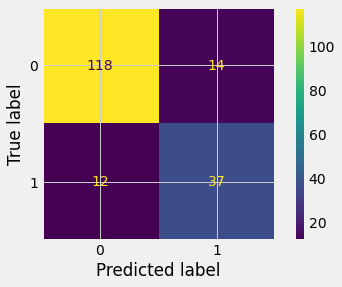

In [ ]:
# plotting a confusion matrix
mnbcm_fs = confusion_matrix(Y_test, mnbpreds_test_fs)
disp = ConfusionMatrixDisplay(confusion_matrix=mnbcm_fs, display_labels=mnbclf_fs.classes_)
disp.plot()
plt.show()

In [ ]:
print('Confusion matrix\n\n', mnbcm_fs)

TP = mnbcm_fs[0,0]
TN = mnbcm_fs[1,1]
FP = mnbcm_fs[0,1]
FN = mnbcm_fs[1,0]
print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)


Confusion matrix

 [[118  14]
 [ 12  37]]

True Positives(TP) =  118

True Negatives(TN) =  37

False Positives(FP) =  14

False Negatives(FN) =  12


Opposite to the Gaussian classifier where the reduced data gave us a higher accuracy, this Bernoulli classifier actually gives us a lower accuracy on reduced data rather than normal data.

#### Let's compare both Gaussian and Bernoulli classifiers
1. Gaussian classifier:
<ul>
1. Accuracy on normal data: 59.67%
2. Accuracy on reduced data: 82.32%
3. ROC Curve is greater in reduced feature data than normal data
</ul>
1. Bernoulli classifier:
<ul>
1. Accuracy on normal data: 87.29%
2. Accuracy on reduced data: 85.64%
3. ROC Curve is greater in normal data than reduced feature data.
</ul>
Here, we see that the Bernoulli classifier performs much better than the Gaussian classifier. If we were to compare the Gaussian classifier on reduced data with Bernoulli on normal data, then we see a very similar accuracy. If I were to choose, I would choose the Bernoulli classifier on normal data, since the data isn't that huge and that won't impact the efficiency.

# Linear Discrimant (LDA)


In [ ]:
# now trying the linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
ldclf = LinearDiscriminantAnalysis()

In [ ]:
# fitting the LDA model on training data set
ldclf = ldclf.fit(X_train_norm, Y_train)
ldclf.score(X_train_norm, Y_train)

0.9019337016574586

In [ ]:
# Predicting the results

In [ ]:
# running the model for testing data set
ldpreds_test = ldclf.predict(X_test_norm)
print (ldpreds_test)

[1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# let's look at the train-test accuracy 
ldpreds_train = ldclf.predict(X_train_norm)
print (ldpreds_train)

[0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0

In [ ]:
# checking the accuracy score on training data
print (ldclf.score(X_train_norm, Y_train))
print ("Model accuracy score on training data= {}%".format(accuracy_score(Y_train, ldpreds_train)*100))

0.9019337016574586
Model accuracy score on training data= 90.19337016574586%


In [ ]:
# Checking for overfitting and underfitting 
print('Training set score: {:.2f}'.format(accuracy_score(Y_train, ldpreds_train)*100))

print('Test set score: {:.2f}'.format(accuracy_score(Y_test, ldpreds_test)*100))


Training set score: 90.19
Test set score: 89.50


Comparing the prediction scores on training and testing scores, we see good similarity between train and test, so we don't see any overfitting/underfitting on the model

In [ ]:
print (ldclf.score(X_test_norm, Y_test))

0.8950276243093923


In [ ]:
print(classification_report(Y_test, ldpreds_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       132
           1       0.88      0.71      0.79        49

    accuracy                           0.90       181
   macro avg       0.89      0.84      0.86       181
weighted avg       0.89      0.90      0.89       181



In [ ]:
print ("Accuracy = {} %".format(accuracy_score(Y_test, ldpreds_test)*100))

Accuracy = 89.50276243093923 %


In [ ]:
lbcm = confusion_matrix(Y_test, ldpreds_test)
print (lbcm)

[[127   5]
 [ 14  35]]


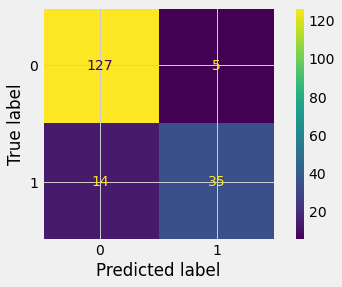

In [ ]:
ldcm = confusion_matrix(Y_test, ldpreds_test)
disp = ConfusionMatrixDisplay(confusion_matrix=ldcm, display_labels=ldclf.classes_)
disp.plot()
plt.show()

In [ ]:
print('Confusion matrix\n\n', ldcm)

TP = ldcm[0,0]
TN = ldcm[1,1]
FP = ldcm[0,1]
FN = ldcm[1,0]
print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)


Confusion matrix

 [[127   5]
 [ 14  35]]

True Positives(TP) =  127

True Negatives(TN) =  35

False Positives(FP) =  5

False Negatives(FN) =  14


According to the confusion matrix above, we see that the classifier has correctly classified 127 rows where a person had diabetes and correctly classified 35 rows where a person did not have diabetes. The model only has 5 false positives which is comparatively lesser than the Naive Bayes models.

In [ ]:
# lets look at the classification accuracy and classification error using the confusion matrix
classification_accuracy = (TP + TN)/ (TP+TN+FP+FN)

classification_error = (FP + FN)/ (TP+TN+FP+FN)

print (classification_accuracy, classification_error)


0.8950276243093923 0.10497237569060773


This model has a really good accuracy and a low error score which makes this model a good one.

### ROC AUC Curve

In [ ]:
fpr, tpr, threshold = roc_curve(Y_test, ldpreds_test)
auc_score = auc(fpr, tpr)

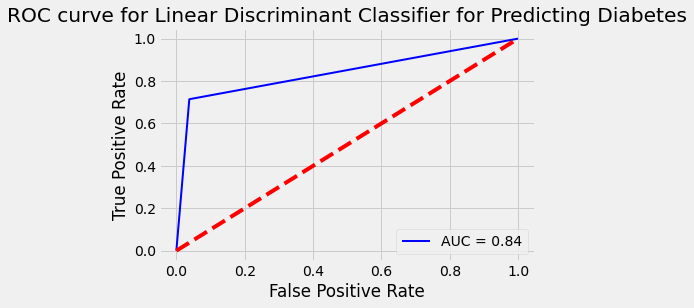

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, 'b', linewidth=2, label = 'AUC = %0.2f' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.title('ROC curve for Linear Discriminant Classifier for Predicting Diabetes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC AUC is the percentage of the ROC plot that is underneath the curve. the higher the score, the better the score. our close is 0.83 which says our classifier is good!

### K-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
k = 10

In [ ]:
scores = cross_val_score(ldclf, X_train_norm, Y_train, cv=k, scoring='accuracy')
scores

array([0.86, 0.86, 0.86, 0.85, 0.82, 0.93, 0.89, 0.92, 0.86, 0.92])

In [ ]:
cvs = []
for i in range(1, k+1):
  cvs.append(i)

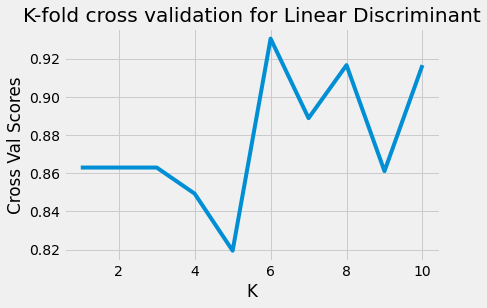

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cvs, scores)
plt.title('K-fold cross validation for Linear Discriminant')
plt.xlabel('K')
plt.ylabel('Cross Val Scores')
plt.show()

Looking at the above k-fold cross validation scores, we see a very high variance in the lower k values, but as we increase the k, the variance decreases and we see a higher accuracy score. the highest accuracy score we see is for K=6

In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8772


If we are to look at the average cross-val-score, we can conclude that we expect the model to be around 87.72% accurate.

In [ ]:
ldclf_fs = LinearDiscriminantAnalysis()

In [ ]:
# fitting the LDA model on training data set
ldclf_fs = ldclf.fit(X_train_norm_fs, Y_train)
ldclf_fs.score(X_train_norm_fs, Y_train)

0.8867403314917127

In [ ]:
# running the model for testing data set
ldpreds_test_fs = ldclf_fs.predict(X_test_norm_fs)
print (ldpreds_test_fs)

[1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print ("Accuracy = {} %".format(accuracy_score(Y_test, ldpreds_test_fs)*100))

Accuracy = 87.84530386740332 %


The accuracy goes lower by approximately 1.5% as we reduce the features, so I would use the classifier on the normal data rather than reducted data 

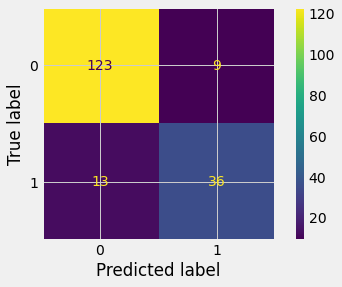

In [ ]:
ldcm_fs = confusion_matrix(Y_test, ldpreds_test_fs)
disp = ConfusionMatrixDisplay(confusion_matrix=ldcm_fs, display_labels=ldclf_fs.classes_)
disp.plot()
plt.show()

In [ ]:
print('Confusion matrix\n\n', ldcm_fs)

TP = ldcm_fs[0,0]
TN = ldcm_fs[1,1]
FP = ldcm_fs[0,1]
FN = ldcm_fs[1,0]
print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)


Confusion matrix

 [[123   9]
 [ 13  36]]

True Positives(TP) =  123

True Negatives(TN) =  36

False Positives(FP) =  9

False Negatives(FN) =  13


According to the confusion matrix above, we see that the classifier has correctly classified 123 rows where a person did not have diabetes and correctly classified 36 rows where a person had diabetes. The model only has 9 false positives which is comparatively more than the normal data.

##### Let's compare LDA on both, normal and reduced data - 


1.   We see a higher accuracy on normal data than the reduced feature data.
2.   We also see higher false positives in reduced feature data. 

Therefore, we will be going with LDA on normal data, as reducing features results in a lower accuracy score.



Conclusion:

Best Scores: 
1. Decision Trees - 97.65% on Normal Data
2. Random Forest - 96%
3. KNN - 95.58%
4. Naive Bayes Gaussian - 82.32% 
5. Naive Bayes Bernoulli - 87.29%
6. LDA - 89.50

The classifier that has the best accuracy score is Decision tree with an accuracy of 97.65% on normal data 



# DONE